In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

In [11]:
dataframe = pd.read_csv("./train.csv")
test_dataframe = pd.read_csv("./test.csv")
passangerId = test_dataframe["PassengerId"]

In [12]:
final_dataframe= dataframe[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']]
final_dataframe = final_dataframe.dropna()
final_dataframe.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [13]:
final_dataframe["Sex"] = final_dataframe["Sex"].replace(to_replace=final_dataframe["Sex"].unique(), value = [1 , 0])

In [14]:
final_dataframe = pd.get_dummies(final_dataframe, drop_first=True) 

In [ ]:
final_dataframe

<Axes: >

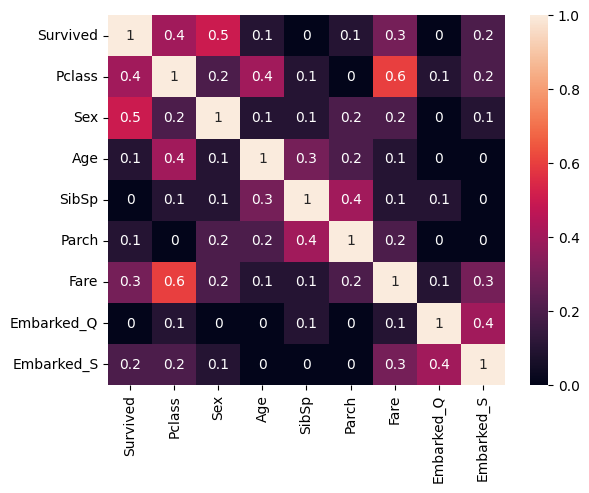

In [15]:
sns.heatmap(round(abs(final_dataframe.corr()), 1), annot=True)

In [16]:
train_y = final_dataframe["Survived"]
train_x = final_dataframe[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked_Q','Embarked_S']]

In [17]:
from sklearn.model_selection import train_test_split

train_data, val_data, train_target, val_target = train_test_split(train_x,train_y, train_size=0.8)

In [18]:
model = GaussianNB()
model.fit(train_data,train_target)
val_pred= model.predict(val_data)

In [19]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(val_target, val_pred)*100)+ "%")

Model accuracy score: 79.0210%
